# Feature Reduction with PCA

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier


In [25]:
data_path = 'data/processed/combined_labeled_standardized.csv'
df = pd.read_csv(data_path)

## Covariance Matrix

## Standardizing the Data

In [27]:
print(df.count)
df =df.dropna(axis='columns')
print(df.count)

<bound method DataFrame.count of                                             patient_id  healthy  \
0                             GTEX-111FC-3326-SM-5GZYV        1   
1                             GTEX-1128S-2826-SM-5N9DI        1   
2                             GTEX-117XS-3126-SM-5GIDP        1   
3                             GTEX-1192X-3226-SM-5987D        1   
4                             GTEX-11DXW-1026-SM-5H11K        1   
..                                                 ...      ...   
495  TCGA-GBM.f2ed0046-56d9-4a89-91d8-de86bf55d007....        0   
496  TCGA-GBM.f2ed0046-56d9-4a89-91d8-de86bf55d007....        0   
497  TCGA-GBM.fe4f878a-6e1b-4d1b-b2a1-957e9da501ac....        0   
498  TCGA-GBM.fe4f878a-6e1b-4d1b-b2a1-957e9da501ac....        0   
499  TCGA-GBM.fe4f878a-6e1b-4d1b-b2a1-957e9da501ac....        0   

     ENSG00000000003.15  ENSG00000000005.6  ENSG00000000457.14  \
0              0.135330          -0.644255           -0.165947   
1             -0.845590       

In [51]:
# data centered around the origin: healthy
X = df.drop(['healthy', 'patient_id', 'ENSG00000241423.2', ], axis=1)
Y = df['healthy']

X

,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001460.18,ENSG00000001461.17,ENSG00000001561.7,ENSG00000001617.12,...,ENSG00000288235.1,ENSG00000288460.1,ENSG00000288558.2,ENSG00000288569.1,ENSG00000288582.2,ENSG00000288596.2,ENSG00000288601.1,ENSG00000288603.1,ENSG00000288611.1,ENSG00000288638.1
0,-0.165947,0.573518,0.286618,0.665016,0.910183,0.018292,-0.065923,-0.364786,-0.432386,-0.643509,...,1.442118,-0.167564,-0.318247,1.347539,-0.086992,0.220568,0.000000,-0.288632,-0.871707,-0.362320
1,-1.272226,-0.115995,0.045738,-0.175576,-0.661327,-0.613966,-0.616802,-0.445653,-0.385480,-0.296890,...,-0.644085,-0.167564,-0.044186,1.395051,-0.086992,-1.072841,0.000000,-0.288632,-0.871707,-0.362320
2,0.284490,-0.215636,-0.549595,-0.106686,0.786310,0.453277,0.391854,0.419596,0.846210,-0.611179,...,-0.080408,1.686318,1.189672,0.556001,-0.086992,0.438793,0.000000,-0.288632,0.396771,-0.362320
3,0.479352,1.753002,1.728641,0.078842,-0.830247,0.536120,0.741008,1.186123,-0.065142,0.954361,...,-0.309608,-0.167564,1.187342,-0.675032,-0.086992,-0.808302,0.000000,-0.288632,-0.425684,-0.362320
4,-0.131297,0.338815,-0.756995,-0.471912,0.822626,-0.177194,0.031629,-0.601356,-0.637808,-0.556544,...,0.378734,-0.167564,-0.069146,-0.675032,-0.086992,0.404978,0.000000,9.602309,1.879187,-0.362320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.643557,-0.643557,-0.477940,-0.592429,-0.234126,-0.442386,-0.465044,-0.465044,-0.497958,-0.462815,...,-1.400993,-0.625606,-0.341819,-0.589527,-0.582211,-0.542942,-0.588279,-0.720248,-0.525000,-0.238249
496,-0.643557,-0.643557,-0.477940,-0.592429,-0.234126,-0.442386,-0.465044,-0.465044,-0.497958,-0.462815,...,-1.400993,-0.625606,-0.341819,-0.589527,-0.582211,-0.542942,-0.588279,-0.720248,-0.525000,-0.238249
497,-0.643557,-0.643557,-0.477940,-0.592429,-0.234126,-0.442386,-0.465044,-0.465044,-0.497958,-0.462815,...,-0.401504,-0.625606,-0.341819,-0.589527,-0.582211,-0.542942,-0.588279,-0.720248,-0.525000,-0.238249
498,-0.643557,-0.643557,-0.477940,-0.592429,-0.234126,-0.442386,-0.465044,-0.465044,-0.497958,-0.462815,...,-0.401504,-0.625606,-0.341819,-0.589527,-0.582211,-0.542942,-0.588279,-0.720248,-0.525000,-0.238249


In [40]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [41]:
pca = PCA().fit(X_scaled)
explained = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained >= 0.95) + 1

print(f"Number of components for >=95% variance: {n_components}")


Number of components for >=95% variance: 242


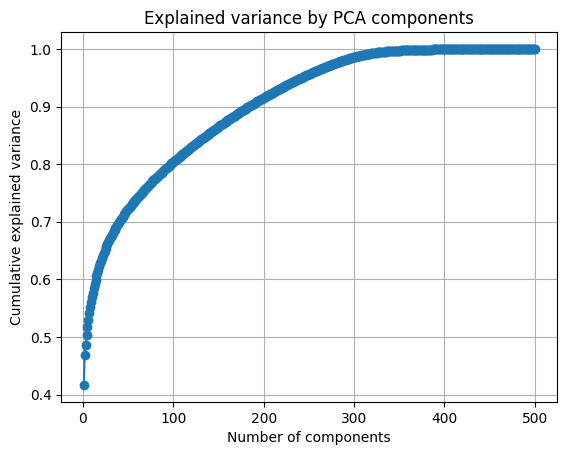

In [42]:
# Visualize explained variance
plt.figure()
plt.plot(np.arange(1, len(explained)+1), explained, marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained variance by PCA components')
plt.grid()
plt.show()

In [43]:
clf = RandomForestClassifier(random_state=42)
scores_no_pca = cross_val_score(clf, X_scaled, Y, cv=5)
print(f"Accuracy without PCA: {scores_no_pca.mean():.3f}")

pcaN = PCA(n_components=n_components)
X_pcaN = pcaN.fit_transform(X_scaled)
scores_pca = cross_val_score(clf, X_pcaN,Y, cv=5)
print(f"Accuracy with PCA ({n_components} components): {scores_pca.mean():.3f}")

Accuracy without PCA: 1.000
Accuracy with PCA (242 components): 0.962


In [33]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Feature columns:", X.columns.tolist())

Training set shape: (400, 28427)
Testing set shape: (100, 28427)
Feature columns: ['ENSG00000000457.14', 'ENSG00000000460.17', 'ENSG00000000938.13', 'ENSG00000000971.16', 'ENSG00000001036.14', 'ENSG00000001084.13', 'ENSG00000001460.18', 'ENSG00000001461.17', 'ENSG00000001561.7', 'ENSG00000001617.12', 'ENSG00000001629.10', 'ENSG00000002016.18', 'ENSG00000002079.14', 'ENSG00000002330.14', 'ENSG00000002587.10', 'ENSG00000002726.21', 'ENSG00000002745.13', 'ENSG00000002746.15', 'ENSG00000002834.18', 'ENSG00000002919.15', 'ENSG00000002933.9', 'ENSG00000003056.8', 'ENSG00000003147.19', 'ENSG00000003400.15', 'ENSG00000003436.16', 'ENSG00000003509.16', 'ENSG00000003756.17', 'ENSG00000003987.14', 'ENSG00000003989.18', 'ENSG00000004059.11', 'ENSG00000004139.14', 'ENSG00000004142.12', 'ENSG00000004399.13', 'ENSG00000004455.17', 'ENSG00000004468.13', 'ENSG00000004478.8', 'ENSG00000004534.15', 'ENSG00000004660.15', 'ENSG00000004700.16', 'ENSG00000004766.17', 'ENSG00000004776.13', 'ENSG00000004779.10

Logistic Regression
Model: Pipeline
Accuracy: 0.4300
Cross-validation score: 0.3975 ± 0.0436


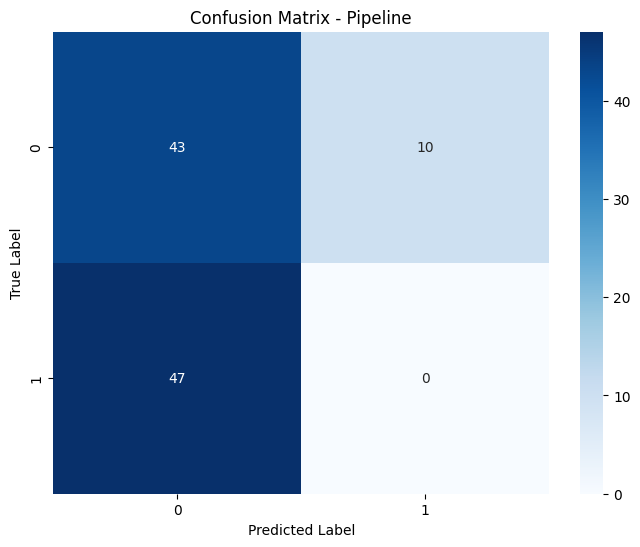


Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.81      0.60        53
           1       0.00      0.00      0.00        47

    accuracy                           0.43       100
   macro avg       0.24      0.41      0.30       100
weighted avg       0.25      0.43      0.32       100

Decision Tree
Model: DecisionTreeClassifier
Accuracy: 0.9900
Cross-validation score: 0.9950 ± 0.0061


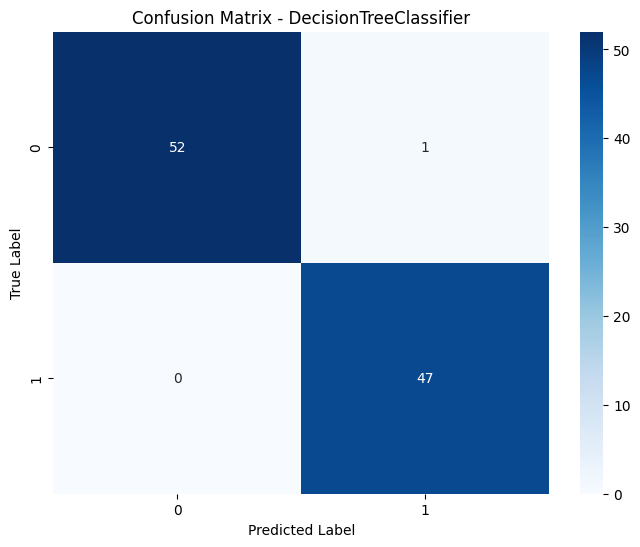


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.98      1.00      0.99        47

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

Random Forest
Model: RandomForestClassifier
Accuracy: 1.0000
Cross-validation score: 1.0000 ± 0.0000


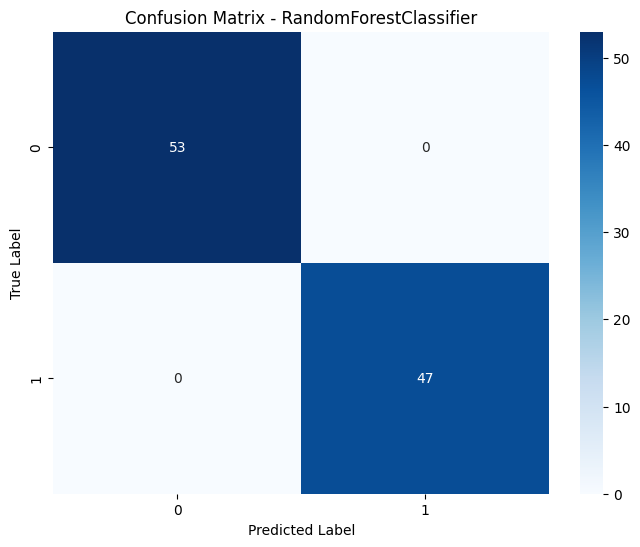


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        47

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

Support Vector Machine
Model: Pipeline
Accuracy: 0.9700
Cross-validation score: 0.9750 ± 0.0079


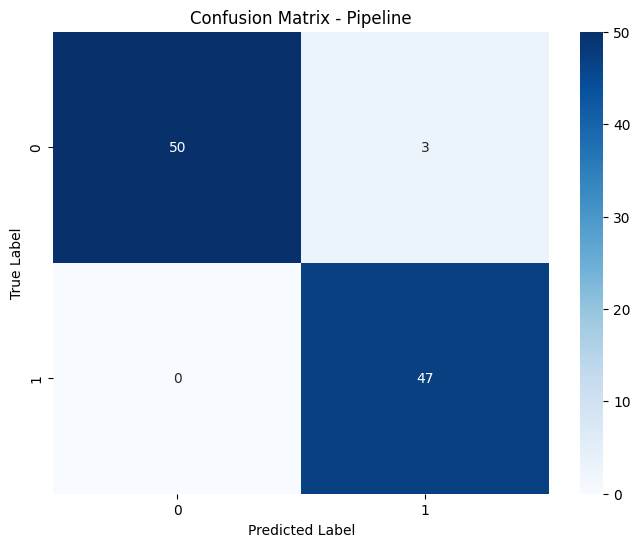


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        53
           1       0.94      1.00      0.97        47

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100

K-Nearest Neighbors
Model: Pipeline
Accuracy: 0.7300
Cross-validation score: 0.6500 ± 0.0426


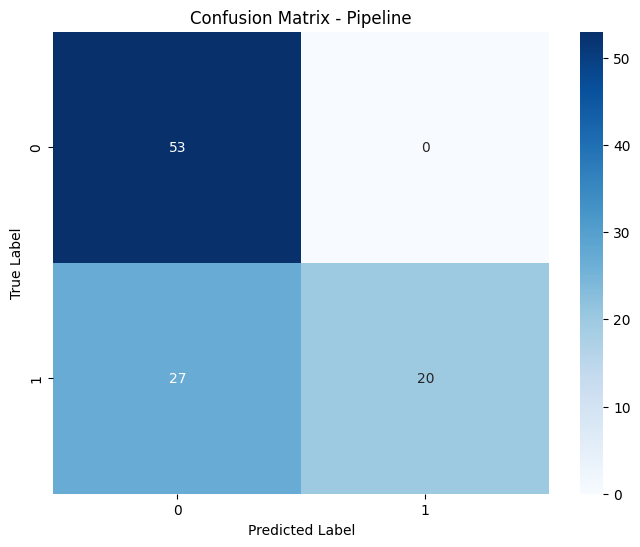


Classification Report:
              precision    recall  f1-score   support

           0       0.66      1.00      0.80        53
           1       1.00      0.43      0.60        47

    accuracy                           0.73       100
   macro avg       0.83      0.71      0.70       100
weighted avg       0.82      0.73      0.70       100

Gradient Boosting
Model: GradientBoostingClassifier
Accuracy: 0.9900
Cross-validation score: 0.9950 ± 0.0061


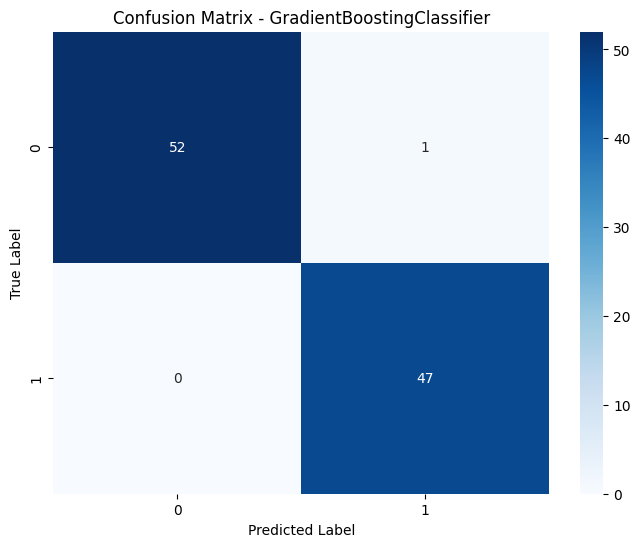


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.98      1.00      0.99        47

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

Neural Network (MLP)
Model: Pipeline
Accuracy: 0.9000
Cross-validation score: 0.9075 ± 0.0562


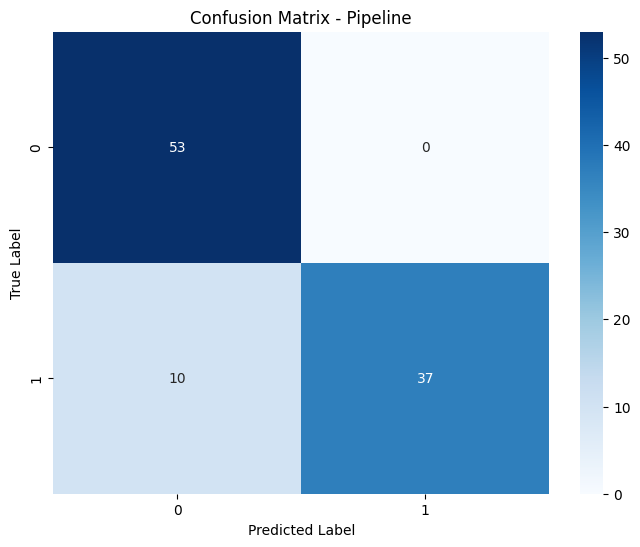


Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        53
           1       1.00      0.79      0.88        47

    accuracy                           0.90       100
   macro avg       0.92      0.89      0.90       100
weighted avg       0.92      0.90      0.90       100



In [44]:
# Create a function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Create cross-validation score
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    
    # Print results
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Cross-validation score: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    
    # Display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model.__class__.__name__}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    # Display classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    return model, accuracy, cv_scores.mean()

# Create a dictionary to store results
results = {}

# 1. Logistic Regression
print("="*50)
print("Logistic Regression")
print("="*50)
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])
lr_model, lr_acc, lr_cv = evaluate_model(lr_pipeline, X_train, X_test, y_train, y_test)
results['Logistic Regression'] = {'accuracy': lr_acc, 'cv_score': lr_cv}

# 2. Decision Tree
print("="*50)
print("Decision Tree")
print("="*50)
dt_model = DecisionTreeClassifier(random_state=42)
dt_model, dt_acc, dt_cv = evaluate_model(dt_model, X_train, X_test, y_train, y_test)
results['Decision Tree'] = {'accuracy': dt_acc, 'cv_score': dt_cv}

# 3. Random Forest
print("="*50)
print("Random Forest")
print("="*50)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model, rf_acc, rf_cv = evaluate_model(rf_model, X_train, X_test, y_train, y_test)
results['Random Forest'] = {'accuracy': rf_acc, 'cv_score': rf_cv}

# 4. Support Vector Machine (SVM)
print("="*50)
print("Support Vector Machine")
print("="*50)
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(kernel='rbf', random_state=42))
])
svm_model, svm_acc, svm_cv = evaluate_model(svm_pipeline, X_train, X_test, y_train, y_test)
results['SVM'] = {'accuracy': svm_acc, 'cv_score': svm_cv}


# 5. K-Nearest Neighbors
print("="*50)
print("K-Nearest Neighbors")
print("="*50)
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])
knn_model, knn_acc, knn_cv = evaluate_model(knn_pipeline, X_train, X_test, y_train, y_test)
results['KNN'] = {'accuracy': knn_acc, 'cv_score': knn_cv}

# 6. Gradient Boosting
print("="*50)
print("Gradient Boosting")
print("="*50)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model, gb_acc, gb_cv = evaluate_model(gb_model, X_train, X_test, y_train, y_test)
results['Gradient Boosting'] = {'accuracy': gb_acc, 'cv_score': gb_cv}

# 7. Neural Network (MLP Classifier)
print("="*50)
print("Neural Network (MLP)")
print("="*50)
mlp_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42))
])
mlp_model, mlp_acc, mlp_cv = evaluate_model(mlp_pipeline, X_train, X_test, y_train, y_test)
results['Neural Network'] = {'accuracy': mlp_acc, 'cv_score': mlp_cv}


<Figure size 1400x700 with 0 Axes>

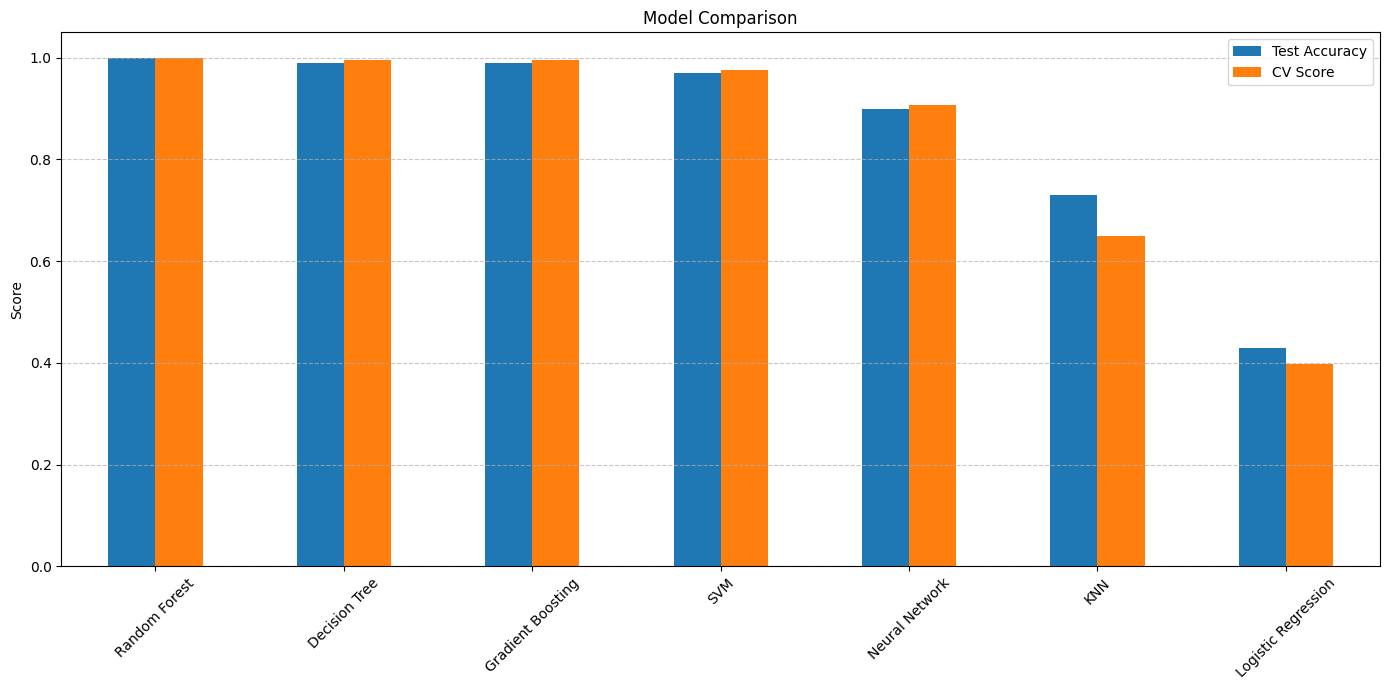


Updated Model Performance Summary:
                     Test Accuracy  CV Score
Random Forest                 1.00    1.0000
Decision Tree                 0.99    0.9950
Gradient Boosting             0.99    0.9950
SVM                           0.97    0.9750
Neural Network                0.90    0.9075
KNN                           0.73    0.6500
Logistic Regression           0.43    0.3975


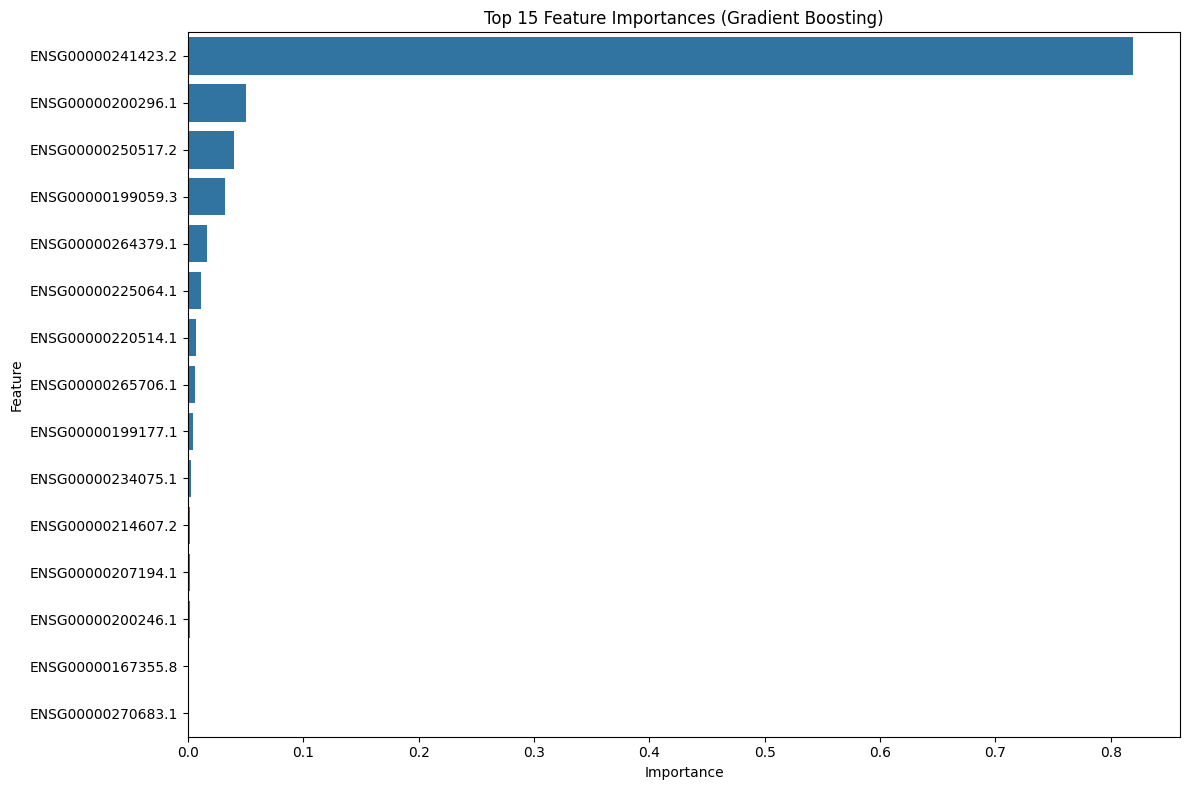

,Feature,Importance
21716,ENSG00000241423.2,0.819054
13008,ENSG00000200296.1,0.050191
23095,ENSG00000250517.2,0.040037
12611,ENSG00000199059.3,0.031885
26005,ENSG00000264379.1,0.016698
17340,ENSG00000225064.1,0.010952
16287,ENSG00000220514.1,0.007205
26287,ENSG00000265706.1,0.005858
12631,ENSG00000199177.1,0.004790
19871,ENSG00000234075.1,0.002584


In [47]:
# Compare model results
results_df = pd.DataFrame(results).T
results_df.columns = ['Test Accuracy', 'CV Score']
results_df = results_df.sort_values('Test Accuracy', ascending=False)
plt.figure(figsize=(14, 7))
results_df.plot(kind='bar', figsize=(14, 7))
plt.title('Model Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\nUpdated Model Performance Summary:")
print(results_df)

# Add feature importance for Gradient Boosting (if it's among the top performers)
if hasattr(gb_model, 'feature_importances_'):
    gb_feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': gb_model.feature_importances_
    })
    gb_feature_importance = gb_feature_importance.sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=gb_feature_importance.head(15))
    plt.title('Top 15 Feature Importances (Gradient Boosting)')
    plt.tight_layout()
    plt.show()

gb_feature_importance.head(15)